# Part_4 Klik - PyTorch clasyfikacja przez sieć neuronową!!
07:05

https://www.researchgate.net/post/What_methods_are_suitable_for_feature_selection_to_improve_classification_accuracy

https://www.researchgate.net/post/What_methods_are_suitable_for_feature_selection_to_improve_classification_accuracy


In [1]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

Sun Mar 15 07:05:37 2020


# <div class="alert-danger">Przegub</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df3 = pd.read_csv('/home/wojciech/Pulpit/4/kliki_uczenie2.csv', 
                  usecols = ('klik','CYF_kat4', 'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9'),nrows=1000
                  )
print(df3.columns)
print(df3.shape)


Index(['klik', 'CYF_kat4', 'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8',
       'CYF_kat9'],
      dtype='object')
(1000, 7)


### <span style="color:pink">Dołączam do zbioru

### <span style="color:blue">Wybór zmiennych do analizy</span>

### Usuwanie wartości NaN

In [3]:
print("1: ",df3.shape)
df3 = df3.dropna(how='any')
print(df3.isnull().sum())
print("2: ",df3.shape)

1:  (1000, 7)
klik        0
CYF_kat4    0
CYF_kat5    0
CYF_kat6    0
CYF_kat7    0
CYF_kat8    0
CYF_kat9    0
dtype: int64
2:  (1000, 7)


In [4]:
df3.dtypes

klik        int64
CYF_kat4    int64
CYF_kat5    int64
CYF_kat6    int64
CYF_kat7    int64
CYF_kat8    int64
CYF_kat9    int64
dtype: object

# <span style="color:green"> Filtrowanie

### <span style="color:blue">Podział na zbiór testowy i wynikowy</span>

In [5]:
y = df3['klik']
X = df3.drop('klik', axis=1)

In [6]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

print ('Zbiór X treningowy: ',Xtrain.shape)
print ('Zbiór X testowy:    ', Xtest.shape)
print ('Zbiór y treningowy: ', ytrain.shape)
print ('Zbiór y testowy:    ', ytest.shape)

Zbiór X treningowy:  (670, 6)
Zbiór X testowy:     (330, 6)
Zbiór y treningowy:  (670,)
Zbiór y testowy:     (330,)


### <span style="color:blue">OVERSAMPLING</span>

In [7]:
print("ytrain = 0: ", sum(ytrain == 0))
print("ytrain = 1: ", sum(ytrain == 1))

ytrain = 0:  547
ytrain = 1:  123


In [8]:
Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
Proporcja = np.round(Proporcja, decimals=0)
Proporcja = Proporcja.astype(int)
print('Ilość -0 klik na -1 klik: ', Proporcja)

Ilość -0 klik na -1 klik:  4


In [9]:
ytrain_OV = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
ytrain_OV.count()

492

Powiękrzyliśmy ilość zmiennych wynikowych 1. Teraz mamy tę samą liczbę wierszy zmiennych wynikowych i zmiennych niezależnych. Teraz wprowadzamy nowe, dodatkowe zmienne 1 do zbioru treningowego.

In [10]:
Xtrain_OV = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
ytrain_OV.count()

492

In [11]:
ytrain_OV = pd.concat([ytrain, ytrain_OV], axis = 0).reset_index(drop = True)
Xtrain_OV = pd.concat([Xtrain, Xtrain_OV], axis = 0).reset_index(drop = True)

print("ilość elementów w zbiorze Xtrain:     ", Xtrain.CYF_kat6.count())
print("ilość elementów w zbiorze Xtrain_OV:  ", Xtrain_OV.CYF_kat6.count())
print("ilość elementów w zbiorze ytrain:     ", ytrain.count())
print("ilość elementów w zbiorze ytrain_OV:  ", ytrain_OV.count())

ilość elementów w zbiorze Xtrain:      670
ilość elementów w zbiorze Xtrain_OV:   1162
ilość elementów w zbiorze ytrain:      670
ilość elementów w zbiorze ytrain_OV:   1162


Poziom zbilansowania zbioru wynikowego:

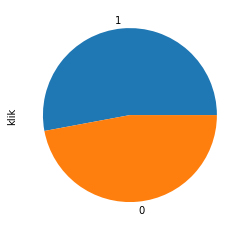

In [12]:
ytrain_OV.value_counts(dropna = False, normalize=True).plot(kind='pie')

In [13]:
Xtest.isnull().sum()

CYF_kat4    0
CYF_kat5    0
CYF_kat6    0
CYF_kat7    0
CYF_kat8    0
CYF_kat9    0
dtype: int64

## Współczynnik korelacji

In [14]:
CORREL = df3.corr().sort_values('klik')
CORREL['klik']

CYF_kat9   -0.123466
CYF_kat5   -0.083469
CYF_kat8    0.003921
CYF_kat7    0.034243
CYF_kat6    0.047601
CYF_kat4    0.107290
klik        1.000000
Name: klik, dtype: float64

Text(0, 0.5, 'Zmienne nezależne ciągłe')

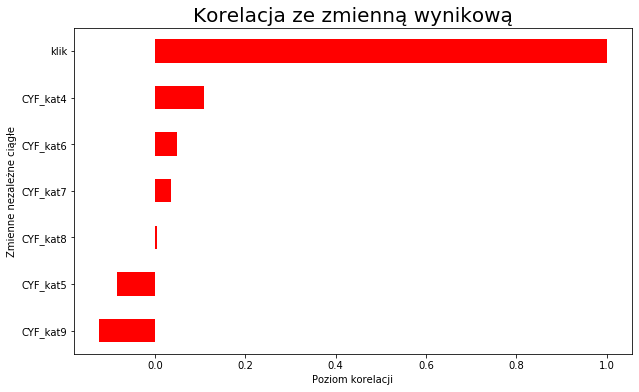

In [15]:
CORREL = df3.corr().sort_values('klik')

plt.figure(figsize=(10,6))
CORREL['klik'].plot(kind='barh', color='red')
plt.title('Korelacja ze zmienną wynikową', fontsize=20)
plt.xlabel('Poziom korelacji')
plt.ylabel('Zmienne nezależne ciągłe')

## Standaryzacja

# # <span style="color:blue"> Model regresji logistycznej ze słabą siatką GRID</span>

In [ ]:
print('Pomiar czasu wykonania tego zadania')
print('Minut: ',(time.time() - start_time)/60) ## koniec pomiaru czasu